In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [2]:
heart = pd.read_csv('D://Юля/heart.csv')

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart.duplicated().sum()

1

In [7]:
heart.drop_duplicates(inplace=True)
heart.duplicated().sum()

0

<AxesSubplot:xlabel='age', ylabel='sex'>

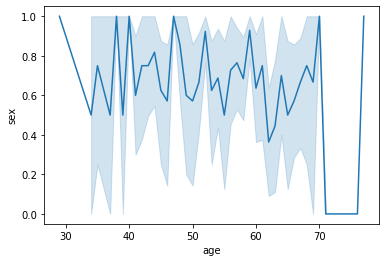

In [8]:
sns.lineplot(x=heart.age, y=heart.sex)

In [9]:
# The training input samples (X)
# The target values (y)

In [10]:
X = heart.drop(['target'], axis = 1)
y = heart.target

In [11]:
# Spliting data into training sets and test sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 40)

In [13]:
max_depth_values = range(1, 90)

In [14]:
scores_data = pd.DataFrame()

In [15]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score= clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [16]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

In [17]:
clf.score(X_test, y_test)

0.77

In [18]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.757426,0.76
0,2,0.757426,0.76
0,3,0.826733,0.77
0,4,0.876238,0.74
0,5,0.930693,0.79


In [19]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                                     value_vars=['train_score', 'test_score'],
                                     var_name='set_type', value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

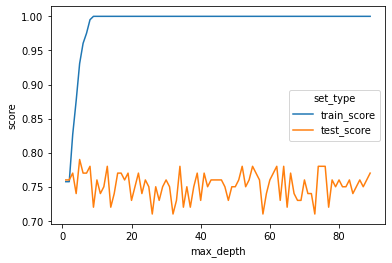

In [20]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [21]:
predictions = clf.predict(X_test)

In [22]:
predictions

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [23]:
precision_score(y_test, predictions, average='micro')

0.77

In [24]:
recall_score(y_test, predictions)

0.6727272727272727

In [25]:
accuracy_score(y_test, predictions, normalize = True)

0.77

In [26]:
# RandomForestClassifier

In [27]:
np.random.seed(0)
rf = RandomForestClassifier()
parametrs = {'n_estimators': [10], 'max_depth':[5]}

In [28]:
X = heart.drop(['target'], axis = 1)
y = heart.target

In [29]:
grid_search_cv_heart_clf = GridSearchCV(rf, parametrs, cv=5)
grid_search_cv_heart_clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5], 'n_estimators': [10]})

In [30]:
grid_search_cv_heart_clf.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [31]:
best_clf = grid_search_cv_heart_clf.best_estimator_

In [32]:
feature_importances = best_clf.feature_importances_

In [33]:
feature_importances

array([0.04617908, 0.02186049, 0.16076454, 0.05920779, 0.05924707,
       0.00643047, 0.01696934, 0.14176154, 0.095403  , 0.07139293,
       0.08588463, 0.13795975, 0.09693935])

In [34]:
feature_importances_df = pd.DataFrame({'features': list(X),
                                     'importance': feature_importances}) 

In [35]:
feature_importances_df

,features,importance
0,age,0.046179
1,sex,0.021860
2,cp,0.160765
3,trestbps,0.059208
4,chol,0.059247
5,fbs,0.006430
6,restecg,0.016969
7,thalach,0.141762
8,exang,0.095403
9,oldpeak,0.071393


In [36]:
feature_importances_df.sort_values('importance', ascending = False)

,features,importance
2,cp,0.160765
7,thalach,0.141762
11,ca,0.137960
12,thal,0.096939
8,exang,0.095403
10,slope,0.085885
9,oldpeak,0.071393
4,chol,0.059247
3,trestbps,0.059208
0,age,0.046179


<AxesSubplot:>

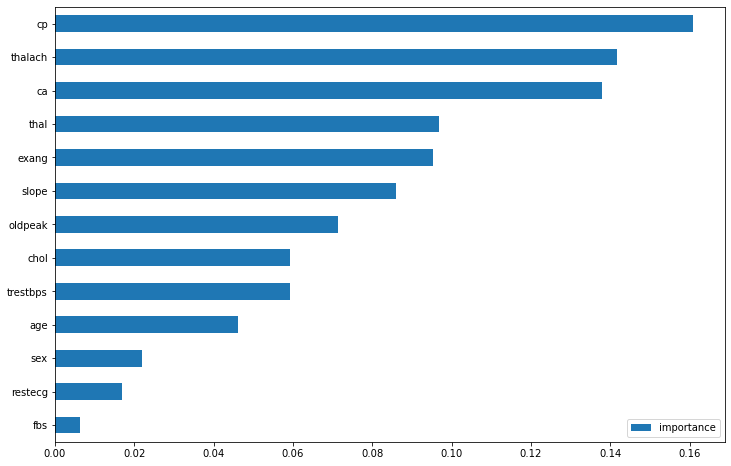

In [37]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))